# <center> Credit scoring, default prediction </center>

The problem of **credit scoring** arises in banks and different credit institutions when making decisions on issuing loans. The task is to make a decision on the basis of some information about the applicant - whether it is worth it to issue a loan, and if so, under what conditions.

![](https://www.theloadedpig.com/wp-content/uploads/2020/09/Credit-Score-Meme-Personal-Finance-101-The-Loaded-Pig.jpeg)

This time, we are going to work with a data set on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Source: [Kaggle Data. Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')

According to the description from Kaggle, here are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

# Part 1. Exploratory data analysis

We see this data set for the first time, let's inspect it first. 

1. What are the types of columns in this data set? Is there any text information or it contains only numbers? 

2. Are there any missing values?

2. How many clients are in this data set? Provide at least two ways to get the answer. **Tip:** 1 row = 1 client.

3. Is there any imbalance in the number of women and men among clients? What are the ratios? 

Are the clients well educated?

Do most of them have a spouse?

4. Analyze the minimal and the maximal values in the column with age. According to this information, decide how many bins (categories) it is reasonable to make. 

In [ ]:
pd.cut(data['AGE'], bins=6)

5. Plot a histogram using age categories. What is the most frequent bin (age range) in this data set? Most of the client are young? 

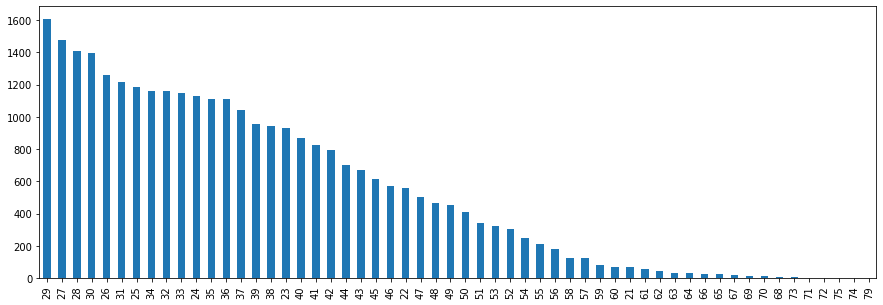

In [15]:
data['AGE'].value_counts().plot(kind='bar', figsize=(15,5));

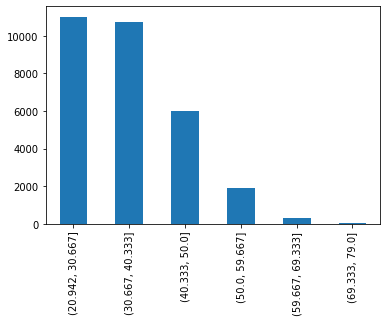

In [16]:
pd.cut(data['AGE'], bins=6).value_counts().plot(kind='bar');

6. What is the average value for the amount of credit card limit? The standard deviation? Is there anything unusual?

In [17]:
data.LIMIT_BAL.mean(), data.LIMIT_BAL.std()

(167484.32266666667, 129747.66156720239)

In [18]:
data.LIMIT_BAL.min(), data.LIMIT_BAL.max()

(10000.0, 1000000.0)

The last columns in our data set ```default.payment.next.month``` takes the value 0 for default payment ('not default'), and value 1 means 'default', the mean of 0.221 states that there are 22.1% of credit card contracts that will default next month. This will be the target value, which we need to predict for clients. 

In [19]:
data['default.payment.next.month'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

Let's vesualize this imbalance.

In [20]:
counts = data["default.payment.next.month"].value_counts()
counts

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [21]:
pd.DataFrame({'default.payment.next.month': counts.index,'values': counts.values})

,default.payment.next.month,values
0,0,23364
1,1,6636


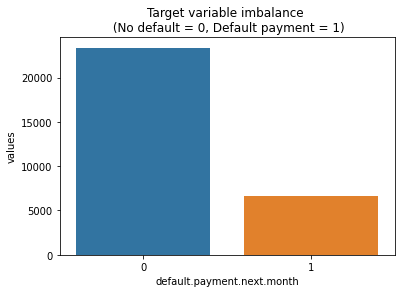

In [22]:
df_for_graph = pd.DataFrame({'default.payment.next.month': counts.index,'values': counts.values})
plt.title('Target variable imbalance \n (No default = 0, Default payment = 1)')
sns.barplot(x='default.payment.next.month', 
            y='values', 
            data=df_for_graph);

A number of **6,636** out of **30,000** (or **22%**) of clients will default next month. The data has not a large disbalance with respect of the target value (default.payment.next.month), however, it is significant.

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable (see more). It is a smoothed version of the histogram and is used in the same concept.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


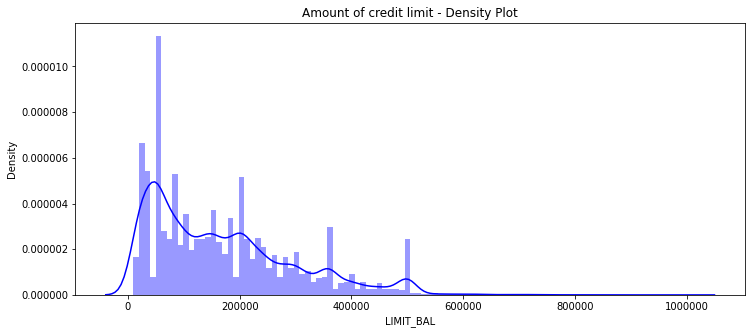

In [29]:
plt.figure(figsize = (12,5))
plt.title('Amount of credit limit - Density Plot')
plt.ticklabel_format(style='plain', axis='both')
sns.distplot(data['LIMIT_BAL'], kde=True, bins=100, color="blue");

In [24]:
data['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
780000.0        2
690000.0        1
1000000.0       1
760000.0        1
327680.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

There are 81 distinct values for amount of credit limit. Largest group of amount of credit limit is apparently for amount of 50K. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


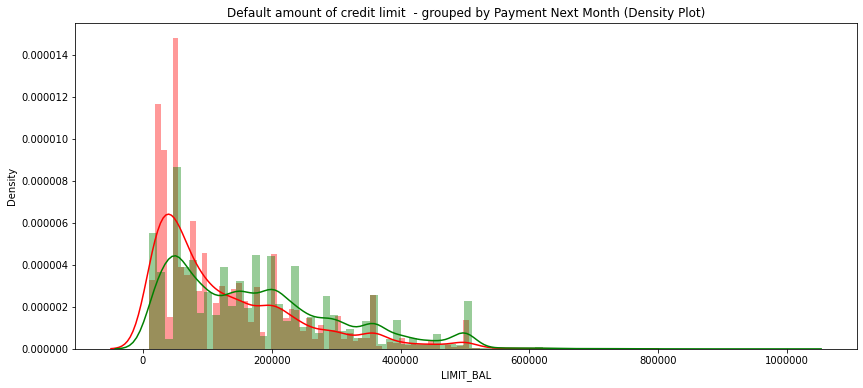

In [25]:
class_0 = data.loc[data['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data.loc[data['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
plt.ticklabel_format(style='plain', axis='both')
plt.xlim()
sns.distplot(class_1, kde=True, bins=81, color="red")
sns.distplot(class_0, kde=True, bins=81, color="green");

In [26]:
class_1.value_counts()

50000.0     885
20000.0     698
30000.0     568
80000.0     363
100000.0    272
           ... 
710000.0      1
560000.0      1
580000.0      1
740000.0      1
327680.0      1
Name: LIMIT_BAL, Length: 65, dtype: int64

According to the plot, try to answer these questions:
* Are there any credit limit amounts that are likely to result in payment delays?
* Is it more risky to issue large credit limits?

In [30]:
class_1_dict = dict(class_1.value_counts())
class_0_dict = dict(class_0.value_counts())

In [31]:
len(class_1_dict.keys())

65

In [32]:
len(class_0_dict.keys())

80

There were no default payments with these credit limit amounts:

In [33]:
set(class_0_dict.keys()) - set(class_1_dict.keys())

{16000.0,
 540000.0,
 570000.0,
 610000.0,
 640000.0,
 650000.0,
 660000.0,
 670000.0,
 690000.0,
 700000.0,
 730000.0,
 750000.0,
 760000.0,
 780000.0,
 800000.0,
 1000000.0}

In all cases in a data set, when this credit limit was taken, it ended with a default:

In [34]:
set(class_1_dict.keys()) - set(class_0_dict.keys())

{327680.0}

How many cases there were?

In [ ]:
class_1_dict[327680.0]

Only one case! We cannot draw any general conclusions for further cases.

In [35]:
set(class_0_dict.keys()) - set(class_1_dict.keys())

{16000.0,
 540000.0,
 570000.0,
 610000.0,
 640000.0,
 650000.0,
 660000.0,
 670000.0,
 690000.0,
 700000.0,
 730000.0,
 750000.0,
 760000.0,
 780000.0,
 800000.0,
 1000000.0}

In [46]:
class_1_dict = dict(class_1.value_counts())
class_0_dict = dict(class_0.value_counts())

ratios = {}
only_defaults = []
for k, v in class_0_dict.items():
    if k in class_0_dict and k in class_1_dict:
        ratios[k] = {'ratio': class_1_dict[k] / class_0_dict[k], 
                     'total_cases': class_1_dict[k] + class_0_dict[k]}
    elif k in class_1_dict and k not in class_1_dict:
        only_defaults.append(k)
    
sorted(ratios.items(), key=lambda x: x[1]['total_cases'], reverse=True)

[(50000.0, {'ratio': 0.35685483870967744, 'total_cases': 3365}),
 (20000.0, {'ratio': 0.5461658841940532, 'total_cases': 1976}),
 (30000.0, {'ratio': 0.54510556621881, 'total_cases': 1610}),
 (80000.0, {'ratio': 0.3014950166112957, 'total_cases': 1567}),
 (200000.0, {'ratio': 0.21462639109697934, 'total_cases': 1528}),
 (150000.0, {'ratio': 0.20260021668472372, 'total_cases': 1110}),
 (100000.0, {'ratio': 0.35051546391752575, 'total_cases': 1048}),
 (180000.0, {'ratio': 0.2148962148962149, 'total_cases': 995}),
 (360000.0, {'ratio': 0.21182943603851445, 'total_cases': 881}),
 (60000.0, {'ratio': 0.3935810810810811, 'total_cases': 825}),
 (140000.0, {'ratio': 0.29360967184801384, 'total_cases': 749}),
 (230000.0, {'ratio': 0.18108974358974358, 'total_cases': 737}),
 (70000.0, {'ratio': 0.40307101727447214, 'total_cases': 731}),
 (210000.0, {'ratio': 0.19086460032626426, 'total_cases': 730}),
 (130000.0, {'ratio': 0.2744755244755245, 'total_cases': 729}),
 (120000.0, {'ratio': 0.32723948

* Compare the results with a simple ```class_*.value_counts()``` command and interpret the difference. 

## Credit limit vs. default payment

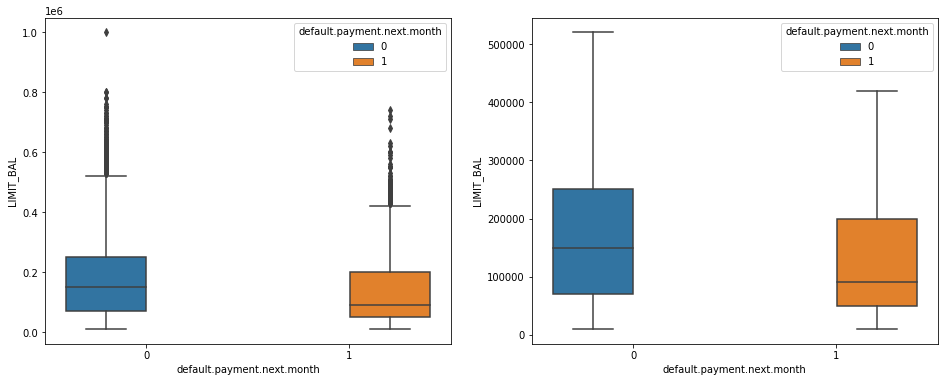

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="default.payment.next.month", y="LIMIT_BAL", 
                hue="default.payment.next.month", data=data, showfliers=True)
s = sns.boxplot(ax = ax2, x="default.payment.next.month", y="LIMIT_BAL", 
                hue="default.payment.next.month", data=data, showfliers=False)
plt.show();

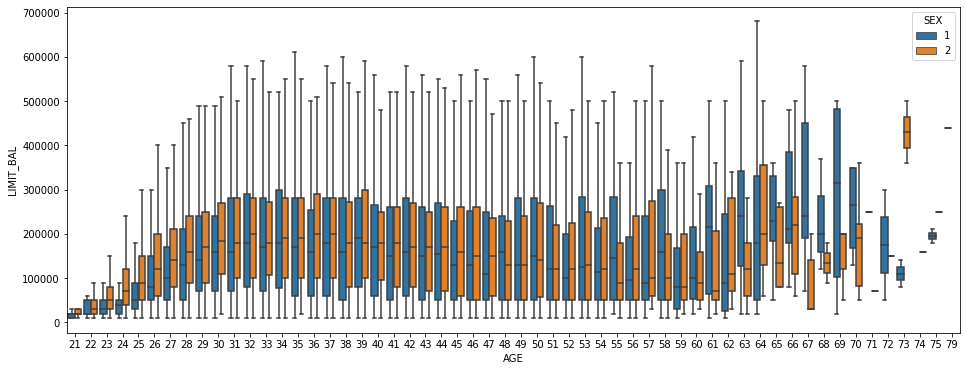

In [39]:
fig, axes_params = plt.subplots(ncols=1, figsize=(16,6))
sns.boxplot(ax=axes_params, x='AGE', y='LIMIT_BAL', hue='SEX',
            data=data, showfliers=False);

For both males and females, Q3, Q4 and mean values are increasing with age until around 32 years and then they are oscillating and get to a maximum of Q4 for males at age 64. Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females. 
<br>How do you think, which factors can affect it? For instance, retirement age? Some other lifetime milestone?

## Features correlation

Let's check the correlation between Repayment status in April - September 2005.

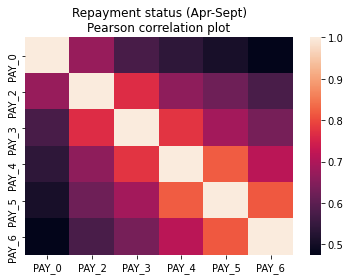

In [40]:
cols = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.title('Repayment status (Apr-Sept)\nPearson correlation plot')
corr = data[cols].corr()
sns.heatmap(corr);

Correlation is decreasing with distance between months. Lowest correlations are between April and September.

## Part 2. Predictive models and quality estimation

### Step 0. Define a problem task 


[FICO® Scores](https://www.fico.com/en/products/fico-score) are used by many lenders, and often range from 300 to 850. <br> A FICO® Score of 670 or above is considered a good credit score, while a score of 800 or above is considered exceptional.

![](https://lh3.googleusercontent.com/proxy/PxGoFfQNTOEV8zGBgAFbdaIedaoEf6dOndjgMPwZHYrIlceAtVfioZPfFpVHtxVtwljsBeLI5fyBs-f1mFATFhKyRARn3lYJCwck7VSO6ysGg0s_2LWqfStEfe51IDi4SDj0bLlBBziUob5V5M17KNyHUg)

If we were asked to predict the credit score for a new client in the range 300 to 850, then we would need to solve the **linear regression problem**. In other words, we need to predict a specific number - the person's credit score.

Another popular challenge is to predict the binary response. Examples:
* Can the bank issue a loan to a new customer (1 - Yes, 0 - No)?
* Will the new (or current) customer default with late payments (1 - Yes, 0 - No)?

A problem task with getting a binary answer is called **logistic regression**. The two answers can be thought of as two classes (class 1 and class 0, "yes" and "no"). We will try to predict the probability of a positive class ("yes") for each client.

Now we will try to predict a client's default (1 - default, 0 - no default). 

### Step 1. Define predictors and target values

Let's define the predictor features and the target features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
target = 'default.payment.next.month'
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
data.columns

In [ ]:
# alternative
features_copy = list(data.columns)
features_copy.remove(target)
features_copy

### Data Cleaning
Next comes some necessary data cleaning tasks as follows:
* Convert text features to numeric ('female' and 'male' -> 1 and 0; 5 education levels  -> categories [1,2,3,4,5], etc) 
* For all columns with dates: convert them to Python’s datetime format
* Drop the original features if you transformed them
* Drop missing values
* Drop outliers (noise)
etc.

### Feature Selection
You don't have to select all features. You can identify the most suitable features for our binary classification problem using the Chi-squared test for categorical features and ANOVA F-statistic for numerical features. 

### Step 2. Split data in train and test set

In [ ]:
train_data, unseen_data = train_test_split(data, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
train_data['default.payment.next.month'].value_counts()

In [ ]:
unseen_data['default.payment.next.month'].value_counts()

### Step 3. Select a model and train it

In [ ]:
model = LogisticRegression(random_state=42, max_iter=300)
model.fit(train_data[features], train_data[target].values)

### Step 4. Make predictions for unseen data

In [ ]:
predictions = model.predict_proba(unseen_data[features])
predictions

### Step 5. Estimate the quality

In [ ]:
# Return the mean accuracy on the given test data and labels
model.score(unseen_data[features], unseen_data[target].values)

In [ ]:
model.coef_[0]

In [ ]:
model.decision_function(unseen_data[features])

## Additional metrics

Weight of Evidence (WoE) and Information Value (IV) are used for feature engineering and selection and are widely used in the credit scoring. 

The formulas to calculate WoE and IV are as follow: $$WoE=ln\frac{\text{% of good customers}}{\text{% of bad customers}}$$

$$IV = \sum (\text{% of good customers} - \text{% of bad customers}) \cdot WoE$$

A positive value of WoE means that the proportion of good customers is greater than bad customers (vice versa for a negative value). It measures the predictive power of an independent variable in relation to the target variable. WoE shows to what extent a specific feature can differentiate between target classes: reliable and unreliable clients. 

IV assists with ranking our features based on their relative importance.


According to Baesens et al. and Siddiqi, WOE and IV analyses enable one to:

* Consider each variable’s independent contribution to the outcome
* Detect linear and non-linear relationships
* Rank variables in terms of its univariate predictive strength
* Visualize the correlations between the variables and the binary outcome
* Compare the strength of continuous and categorical variables without creating dummy variables
* Handle missing values without imputation
* Assess the predictive power of missing values

Reading materials:
* [Credit Card Default: a very pedagogical notebook](https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook)
* [6 Useful Automated ML Tools (using the same data set)](https://www.kaggle.com/pavansanagapati/6-useful-automated-ml-tools-for-data-scientists)
<br>Good explanations of WoE and IV:
* [How to Develop a Credit Risk Model and Scorecard](https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03)

References:
* Baesens, B., Roesch, D., & Scheule, H. (2016). Credit risk analytics: Measurement techniques, applications, and examples in SAS. John Wiley & Sons.
*  Siddiqi, N. (2012). Credit risk scorecards: developing and implementing intelligent credit scoring. John Wiley & Sons.